In [1]:
import autograd.numpy as np
import matplotlib.pyplot as plt

from lib.functions import sample_trajectory
from lib.kalman import KalmanSmoother
from lib.lqr import iLQR
from lib.models.dynamics import LinearDynamics
from lib.models.measurements import LinearGaussianMeasurement
from lib.models.priors import GaussianPrior
from lib.plotters import *

## General Parameters

In [2]:
num_steps = 100

Nx = 1
Nu = 1
Ny = 1

## Create the Generative Model
### Dynamics

In [3]:
A = np.random.uniform(0.8, 1.0, size=(Nx, Nx))
B = np.random.uniform(-1.0, 1.0, size=(Nx, Nu))
dynamics = LinearDynamics(Nx, Nu, A, B)

### Measurements

In [4]:
C = np.random.uniform(-2.0, 2.0, size=(Ny, Nx))
y_cov = 0.5*np.eye(Ny)
meas_model = LinearGaussianMeasurement(Ny, y_cov, C)

### Priors

In [5]:
x0_prior = GaussianPrior(Nx, np.zeros(Nx), 2*np.eye(Nx))
u_prior = GaussianPrior(Nu, np.zeros(Nu), 0.5*np.eye(Nu))

## Sample a Trajectory

In [6]:
true_xs, true_us, ys = sample_trajectory(
    dynamics,
    meas_model,
    u_prior,
    x0_prior,
    num_steps
)

## Run Inference Methods

In [7]:
ilqr = iLQR(
    dynamics,
    meas_model,
    u_prior,
    x0_prior
)

us_init = [u_prior.sample(t) for t in range(num_steps)]

ilqr_xs, ilqr_us = ilqr(ys, us_init)

In [8]:
kalman_smoother = KalmanSmoother(
    dynamics,
    meas_model,
    u_prior,
    x0_prior
)

kalman_xs, kalman_us = kalman_smoother(ys)

## Plot the Results

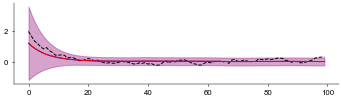

In [9]:
fig, ax = plt.subplots(Nx, 1, figsize=(6, 0.5+Nx))

plot_groundtruths([ax], true_xs)
plot_gaussians([ax], ilqr_xs, "b", label="ilqr")
plot_gaussians([ax], kalman_xs, "r", label="kalman")
plt.show()

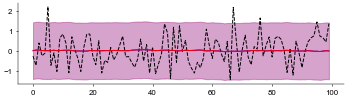

In [10]:
fig, ax = plt.subplots(Nu, 1, figsize=(6, 0.5+Nu))

plot_groundtruths([ax], true_us)
plot_gaussians([ax], ilqr_us, "b", label="ilqr")
plot_gaussians([ax], kalman_us, "r", label="kalman")
plt.show()

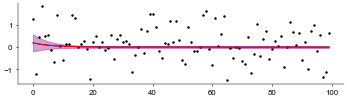

In [11]:
fig, ax = plt.subplots(Ny, 1, figsize=(6, 0.5+Ny))

plot_groundtruths([ax], ys, markers=True)
plot_measurements([ax], meas_model, ilqr_xs, "b", label="ilqr")
plot_measurements([ax], meas_model, kalman_xs, "r", label="kalman")
plt.show()